<div style="border:1px solid black; padding:10px;">
  <h1 style="color:lightblue;">👖Customer Shopping Trends Dataset👔</h1>
  <div style="color:white;">
  English;The Customer Shopping Preferences Dataset offers valuable insights into consumer behavior and purchasing patterns. Understanding customer preferences and trends is critical for businesses to tailor their products, marketing strategies, and overall customer experience. This dataset captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Analyzing this data can help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction. The dataset stands as a valuable resource for businesses aiming to align their strategies with customer needs and preferences. It's important to note that this dataset is a Synthetic Dataset Created for Beginners to learn more about Data Analysis and Machine Learning.
  <br>
  <br>
  Japanese;Customer Shopping Preferences Datasetは、消費者の行動と購買パターンに関する貴重な洞察を提供します。顧客の嗜好や傾向を理解することは、企業が製品、マーケティング戦略、全体的な顧客体験を調整する上で非常に重要です。このデータセットは、年齢、性別、購入履歴、好みの支払い方法、購入頻度など、幅広い顧客属性を捉えています。このデータを分析することで、企業は情報に基づいた意思決定を行い、製品提供を最適化し、顧客満足度を高めることができる。このデータセットは、戦略を顧客のニーズや嗜好に合わせることを目指す企業にとって、貴重なリソースとなる。このデータセットは、データ分析と機械学習について学ぶために初心者のために作成された合成データセットであることに注意することが重要です。
  </div>
</div>

<div style="border:1px solid black; padding:10px;">
<h3 style="color:lightblue;">👖Dataset Glossary (Column-wise)👔</h3>
<p style="color:white;">
<iframe src="https://www.kaggle.com/embed/iamsouravbanerjee/shopping-trends-unveiled-eda-for-beginners?cellIds=7&kernelSessionId=149286501" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="👔 Shopping Trends Unveiled: EDA for Beginners 👖"></iframe>
</div>

<h3 style="color:lightblue;">👖Importing Libraries👔</h3>

In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<h3 style="color:lightblue;">👖Loading the Dataset👔</h3>

In [3]:
df = pd.read_csv("shopping_trends.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3816,3817,29,Female,Coat,Outerwear,86,Maryland,S,Silver,Summer,4.30,No,Store Pickup,No,No,45,Credit Card,Fortnightly
557,558,18,Male,Shirt,Clothing,60,Alaska,M,White,Spring,2.90,Yes,Free Shipping,Yes,Yes,31,Debit Card,Weekly
1469,1470,28,Male,Jewelry,Accessories,98,Mississippi,M,Purple,Winter,4.40,No,Standard,Yes,Yes,31,PayPal,Every 3 Months
966,967,58,Male,Dress,Clothing,55,Kentucky,M,Brown,Spring,4.90,Yes,Express,Yes,Yes,19,Cash,Annually
1694,1695,20,Male,Shirt,Clothing,67,Mississippi,M,Turquoise,Summer,2.70,No,Express,No,No,20,Debit Card,Fortnightly


<h3 style="color:lightblue;">👖Checking the shape of the Dataset👔</h3>

In [6]:
df.shape

(3900, 18)

<h3 style="color:lightblue;">👖Checking the number of Columns in the Dataset👔</h3>

In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

<h3 style="color:lightblue;">👖Information about the Dataset👔</h3>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


<h3 style="color:lightblue;">👖Checking if there are any duplicate values present in the dataset or not ?👔</h3>

In [10]:
df.duplicated().sum()

0

<div style="border:1px solid black; padding:10px;">
<h3 style="color:lightblue;">👖visualization.1👔</h3>
<p style="color:white;">

📌 plt.figure(figsize = (20, 6)): This initializes a new figure for plotting and sets the figure size to 20 inches by 6 inches.

📌 ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0): This line is doing several things:

📌 df["Gender"].value_counts(): It calculates the count of unique values in the "Gender" column of the DataFrame df.

📌 .plot(kind = 'bar', color = colors, rot = 0): It creates a bar chart with the counts, using the colors list defined earlier for the bar colors and setting the rotation of the x-axis labels to 0 (meaning they will be displayed horizontally).

📌 ax: This is a variable that stores the Axes object returned by the plot function, which will be used to further customize the plot.
Setting X-axis Tick Labels:

📌 ax.set_xticklabels(('Male', 'Female')): This sets custom labels for the ticks on the x-axis. It assumes that the value counts for gender will return two categories, which are labeled as "Male" and "Female".

📌 ax.annotate(...): For each bar, it adds an annotation, which is the height of the bar (representing the count of occurrences for each gender). This annotation is placed slightly to the right of the center of the bar (controlled by p.get_x() + 0.25) and just above the bar (p.get_height() + 1).

📌 ha = 'center', va = 'bottom': These arguments center the text horizontally and place it at the bottom of the text box vertically.

📌 ax.tick_params(axis = 'both', labelsize = 15): This line sets the tick parameters for both the x-axis and y-axis, changing the label size to 15. It is inside the loop, which is a common mistake; it should be outside the loop to be called just once.

📌 plt.xlabel(...) and plt.ylabel(...): These lines set the labels for the x-axis and y-axis, respectively. They also set the font weight to bold, the color to a shade of red (#D71313), the font size to 14, and add a padding of 20 units to both labels.
</div>

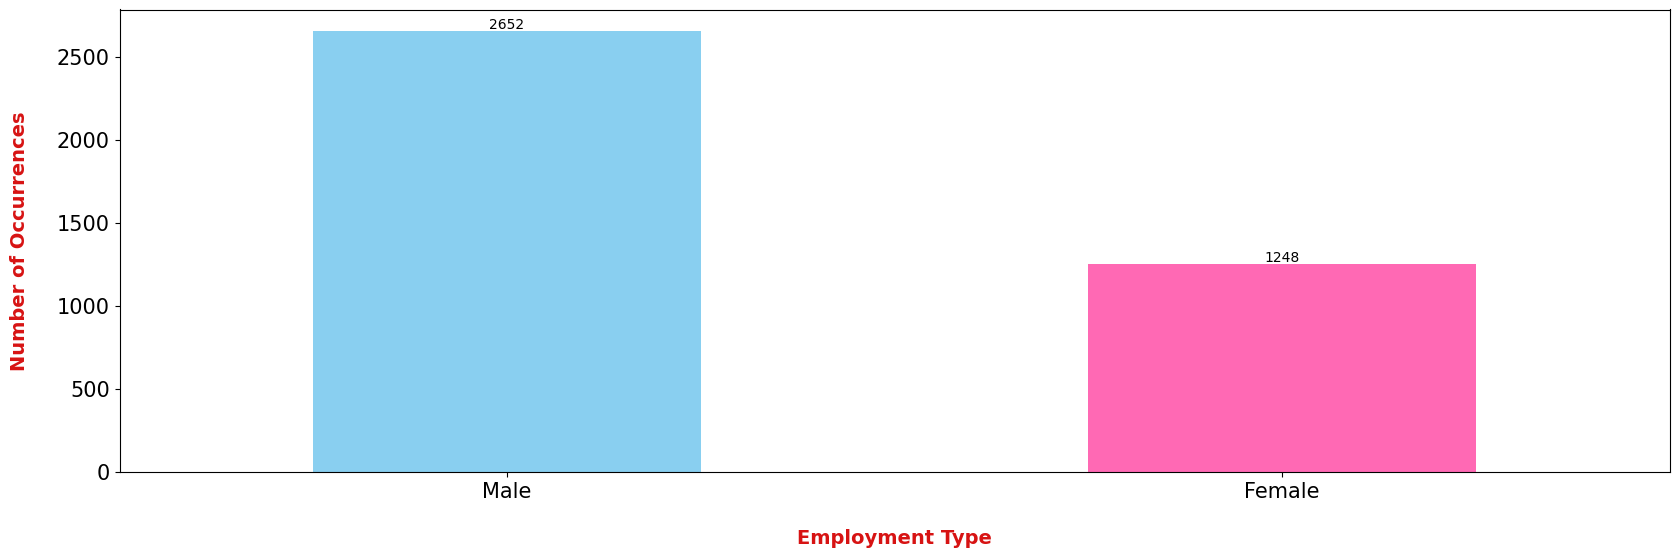

In [11]:
plt.figure(figsize = (20, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

<div style="border:1px solid black; padding:10px;">
<h3 style="color:lightblue;">👖visualization.2👔</h3>
<p style="color:white;">

📌 plt.figure(figsize = (20, 6)): It sets up a new figure for plotting with a width of 20 inches and a height of 6 inches.

📌 counts = df["Gender"].value_counts(): It calculates the frequency of each unique value in the "Gender" column, which will be used as the data for the pie chart.

📌 explode = (0, 0.1): This creates a tuple that will be used to "explode" or offset slices of the pie chart. In this case, the second slice (which is presumably for 'Female' if 'Male' is the first) will be offset from the center of the pie.

📌 counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%'): This line does the actual plotting:

📌 kind = 'pie': Specifies that a pie chart should be created.

📌 fontsize = 12: Sets the font size for the text in the plot to 12.

📌 colors = colors: Uses the predefined colors list for the colors of the pie slices.

📌 explode = explode: Applies the previously defined explode settings to offset the second slice.

📌 autopct = '%1.1f%%': Automatically adds a label to each slice with the percentage it represents, formatted to one decimal place.

📌 plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20): Sets the label for the x-axis (which, in the context of a pie chart, serves as a title or a description below the chart), with bold font weight, a specific color, font size of 14, and a padding of 20.

📌plt.axis('equal'): Ensures that the pie chart is drawn as a circle by setting the aspect ratio to be equal.

📌plt.legend(labels = counts.index, loc = "best"): Adds a legend to the plot, with labels corresponding to the indices of the counts Series (which would be the unique values from the "Gender" column), and positions it in the "best" location as determined by matplotlib.
</div>

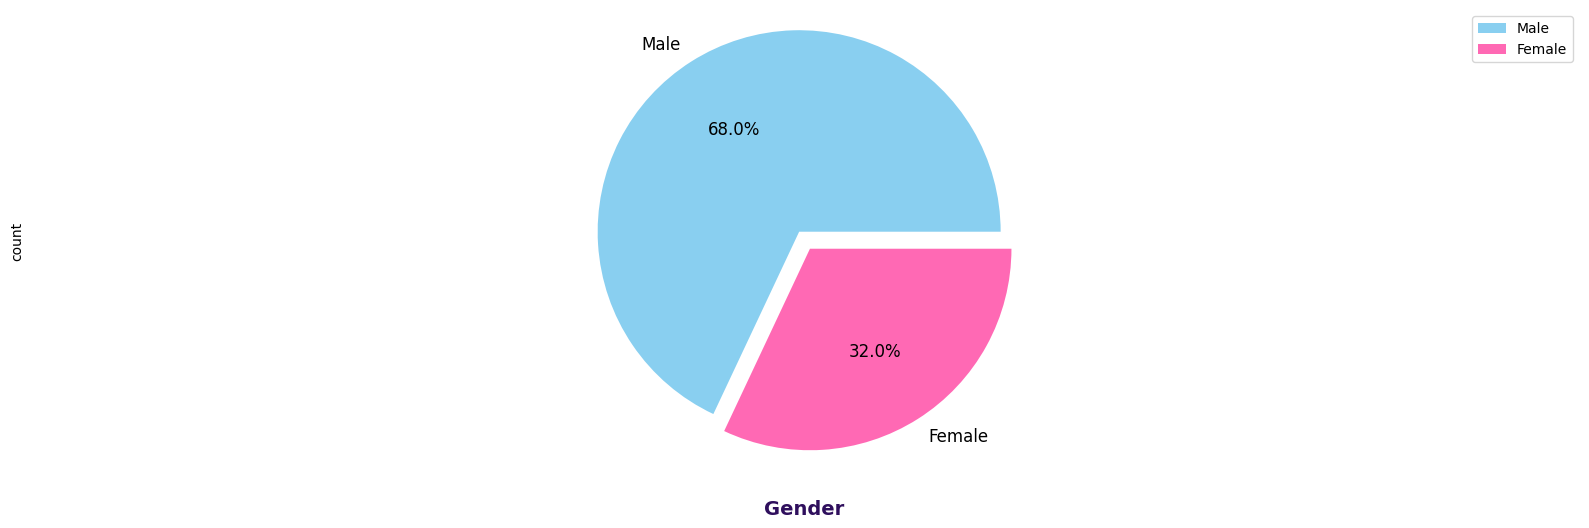

In [12]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style="border:1px solid black; padding:10px;">
<h3 style="color:lightblue;">👖visualization.3👔</h3>
<p style="color:white;">

📌 ax.hist(...) : creates a histogram for the data in the "Age" column. The parameters here are as follows

📌bins = 25: Set the number of bins (bars) in the histogram to 25.

📌edgecolor = 'black': Sets the color of the border of each bin to black.

📌alpha = 0.7: sets the transparency of the histogram to 0.7 (1 is fully opaque).

📌density = True: Plots the bin height as density, normalized so that the area equals 1.

📌df['Age'].plot(kind = 'kde', color = 'red', ax = ax): adds a plot of the kernel density estimate for the data in the "Age" column. This provides a smooth estimate of the distribution of the data. This plot is drawn on top of the histogram already created.

📌ax.legend(['Density Curve', 'Histogram']): add a legend to identify the density curve and histogram.
</p>
</div>

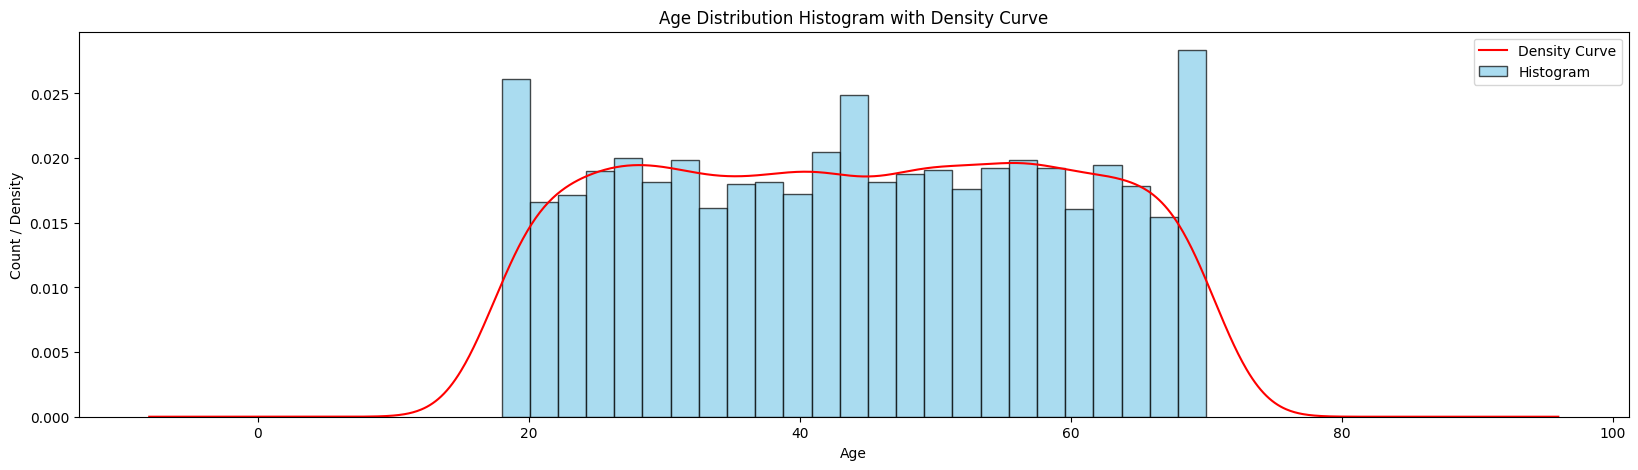

In [13]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

<h5 style="color:white;">🙏Apologies: code explanations have been omitted where appropriate from the following visualization. Please search and look up the places you don't understand by yourself. 🙏</h5>

In [14]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

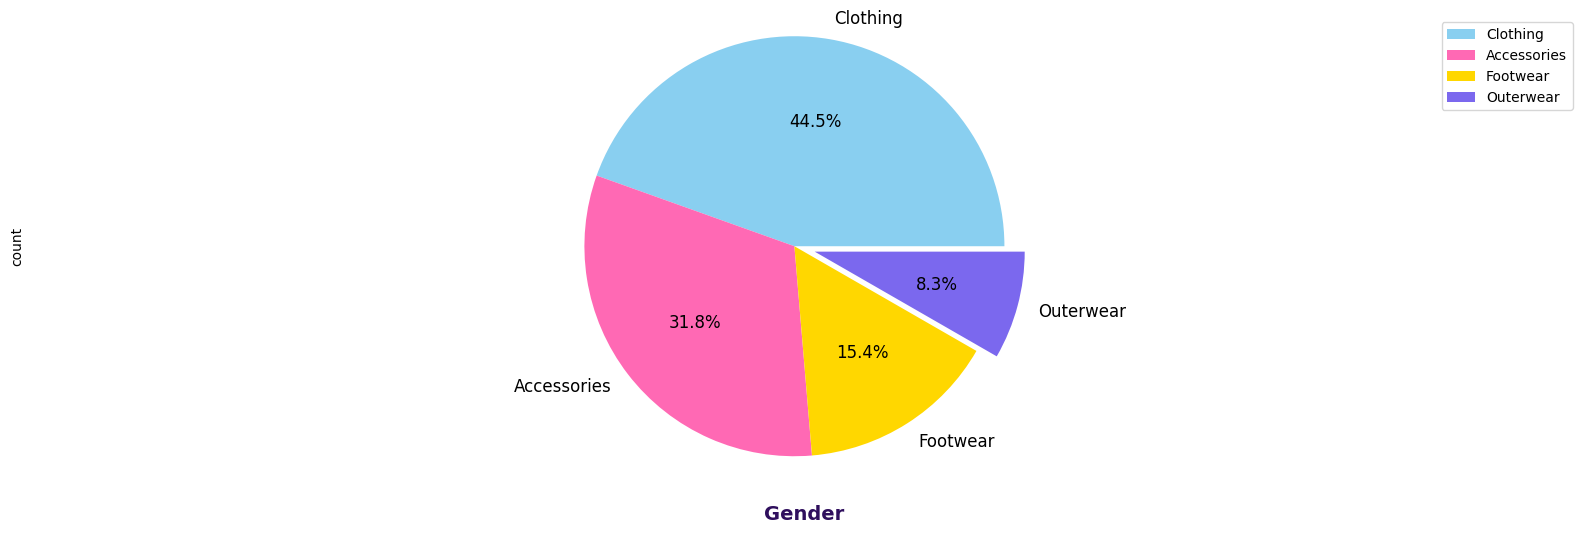

In [15]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [16]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

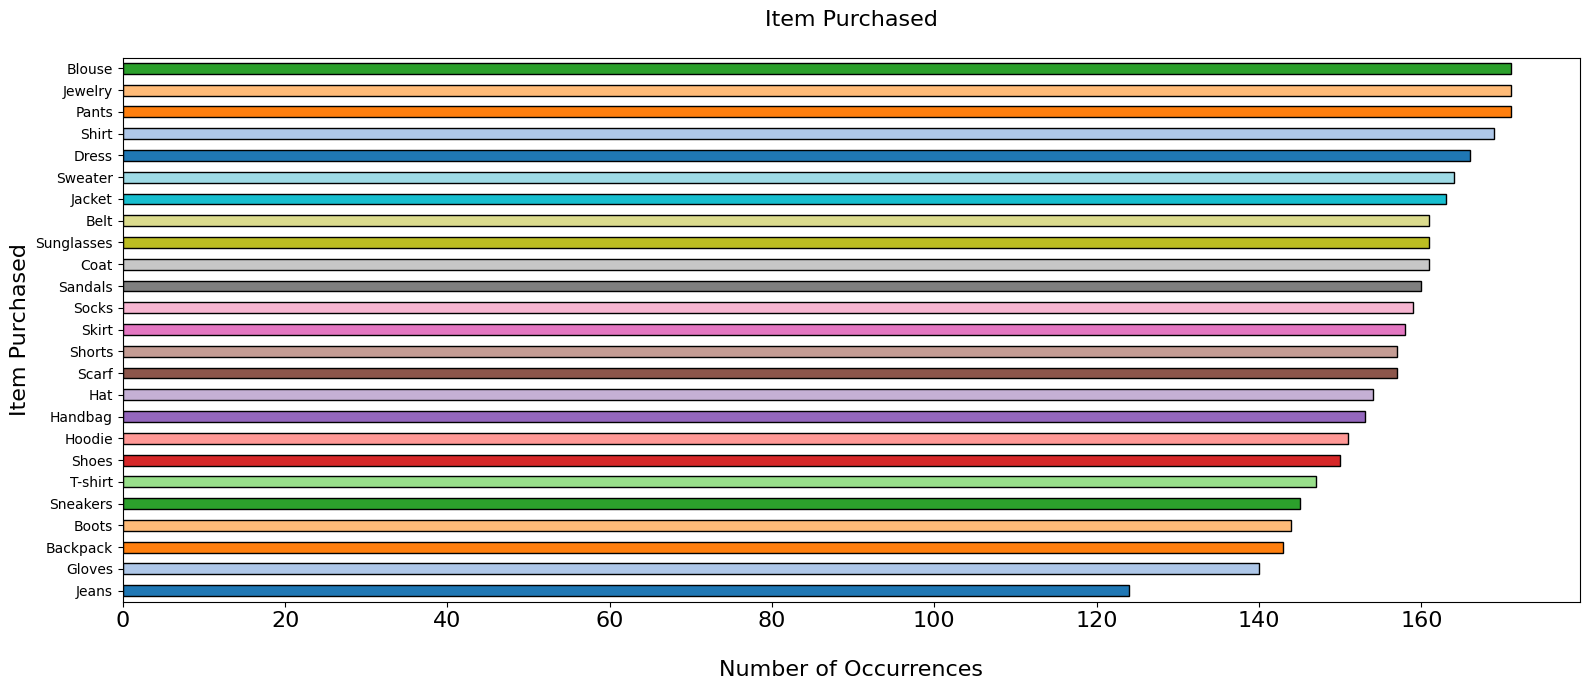

In [17]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [18]:
df["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

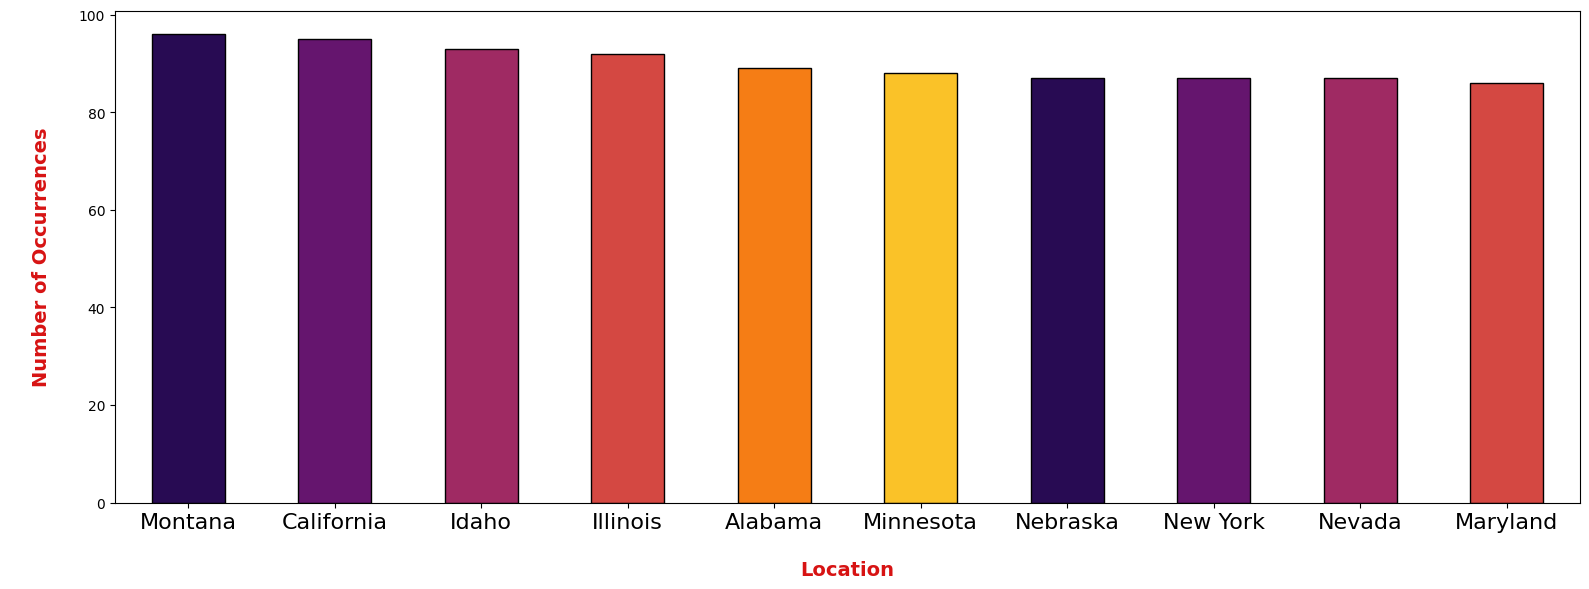

In [19]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [20]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

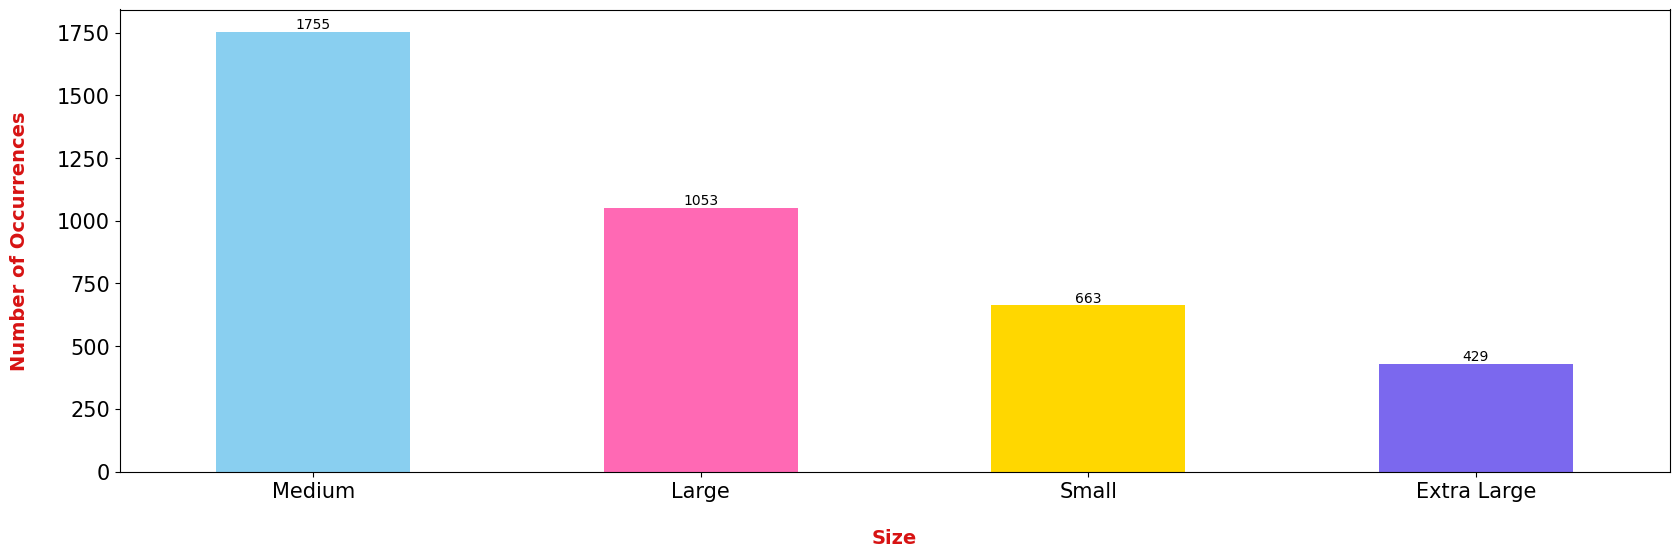

In [21]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

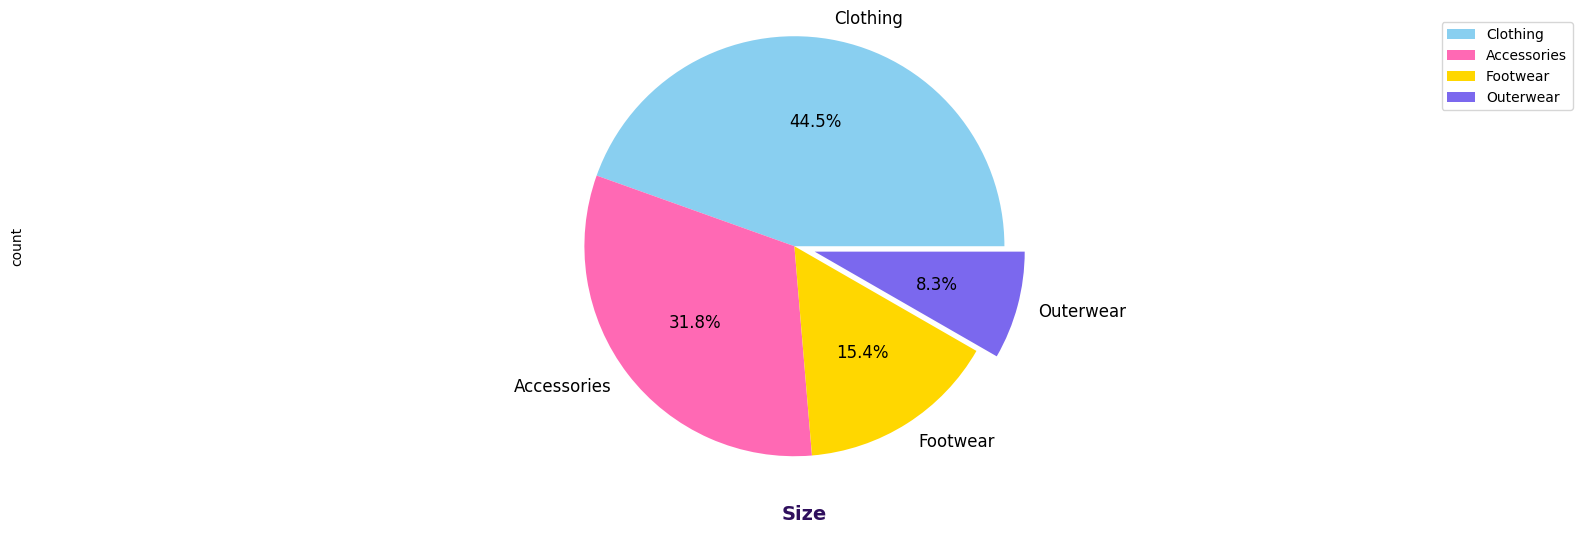

In [22]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [23]:
df["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

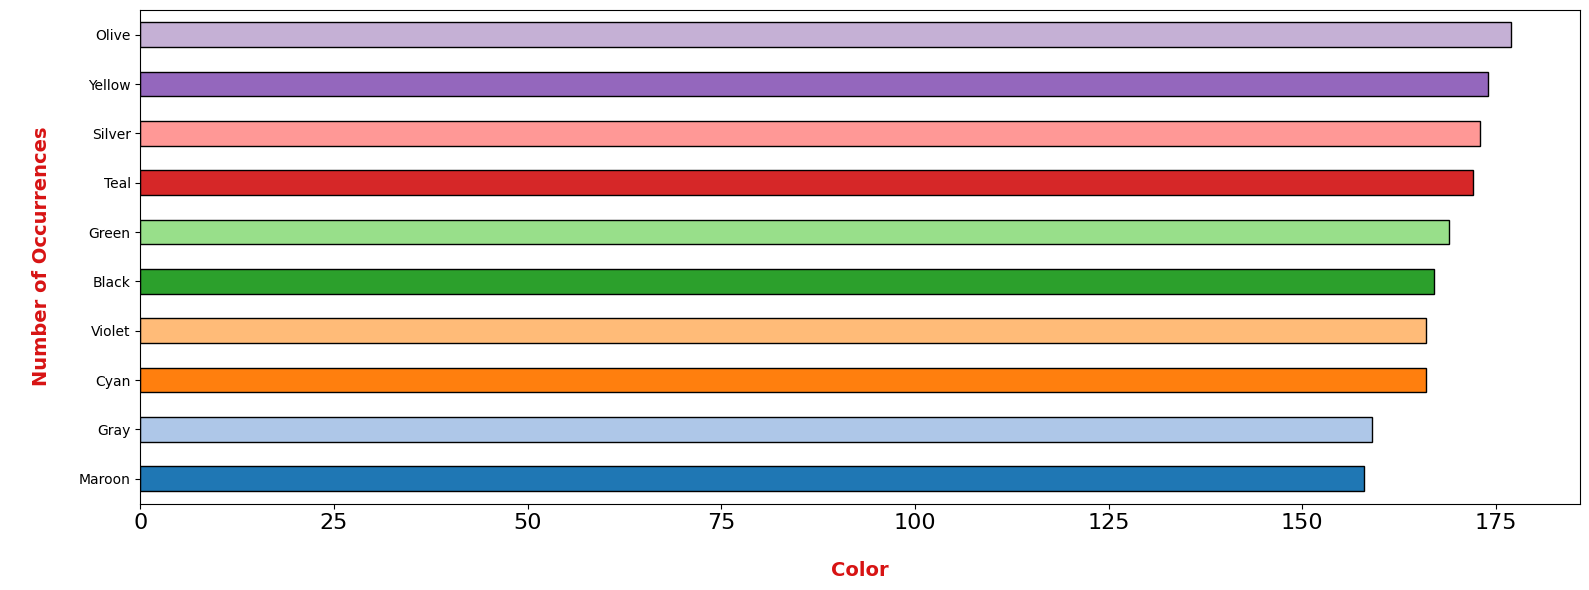

In [24]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [25]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

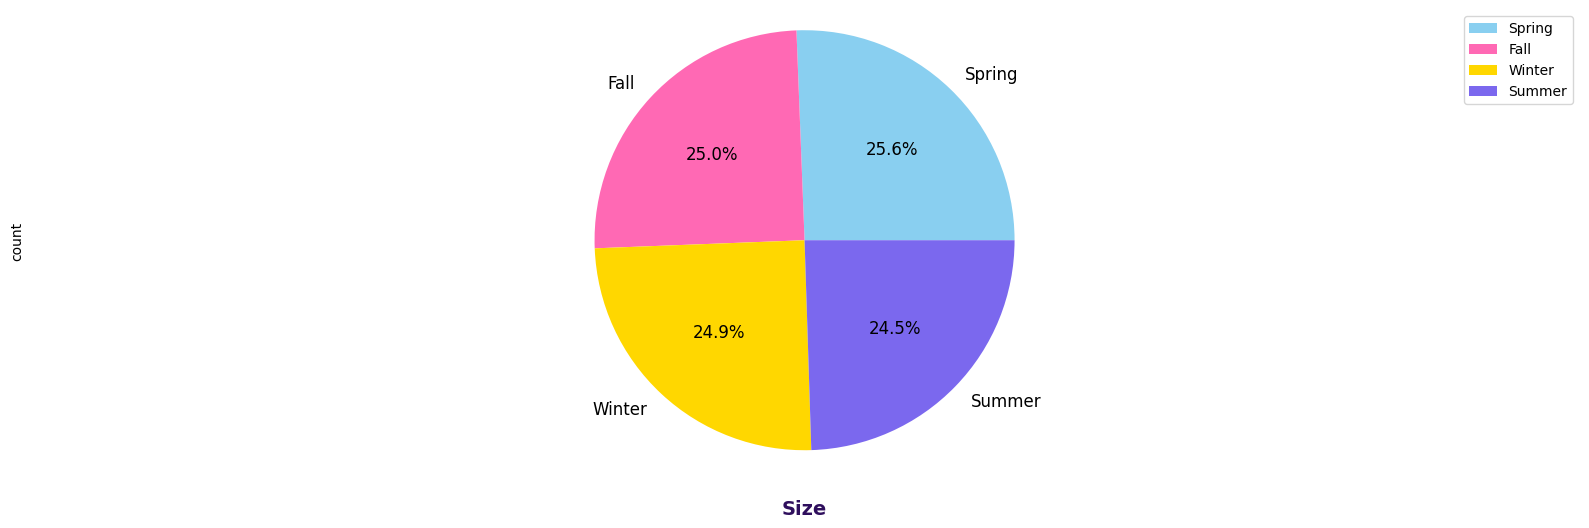

In [26]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [27]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

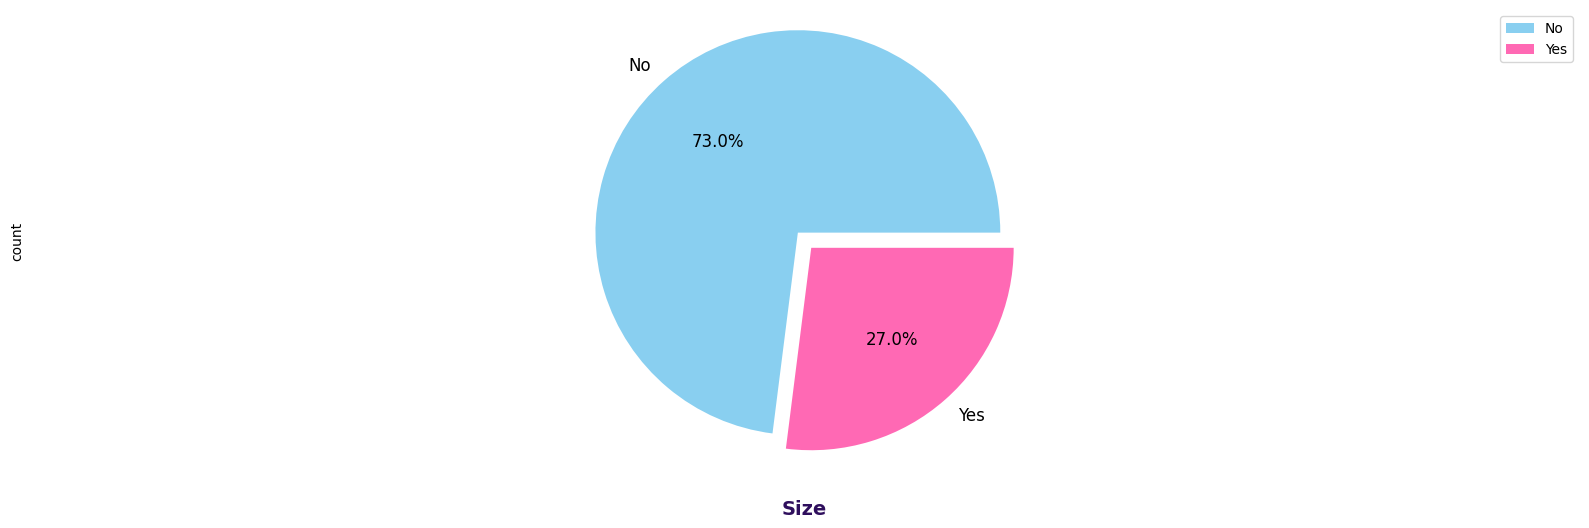

In [28]:
plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [29]:
df["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

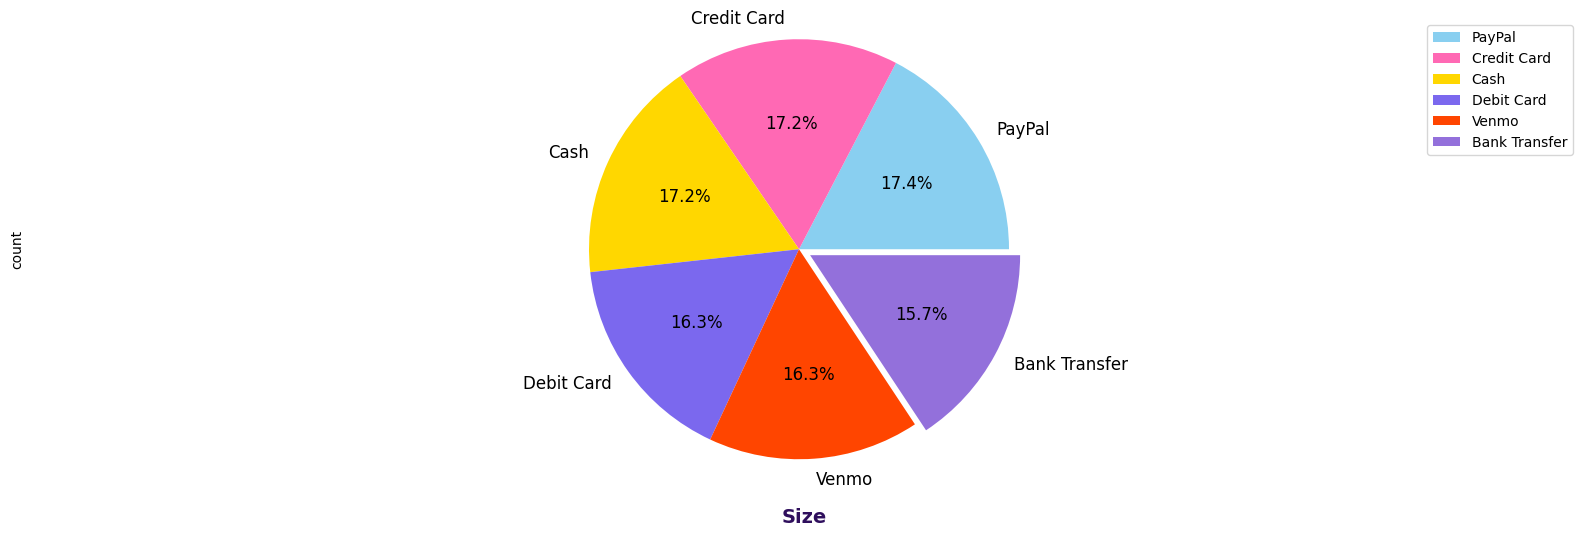

In [30]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [31]:
df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

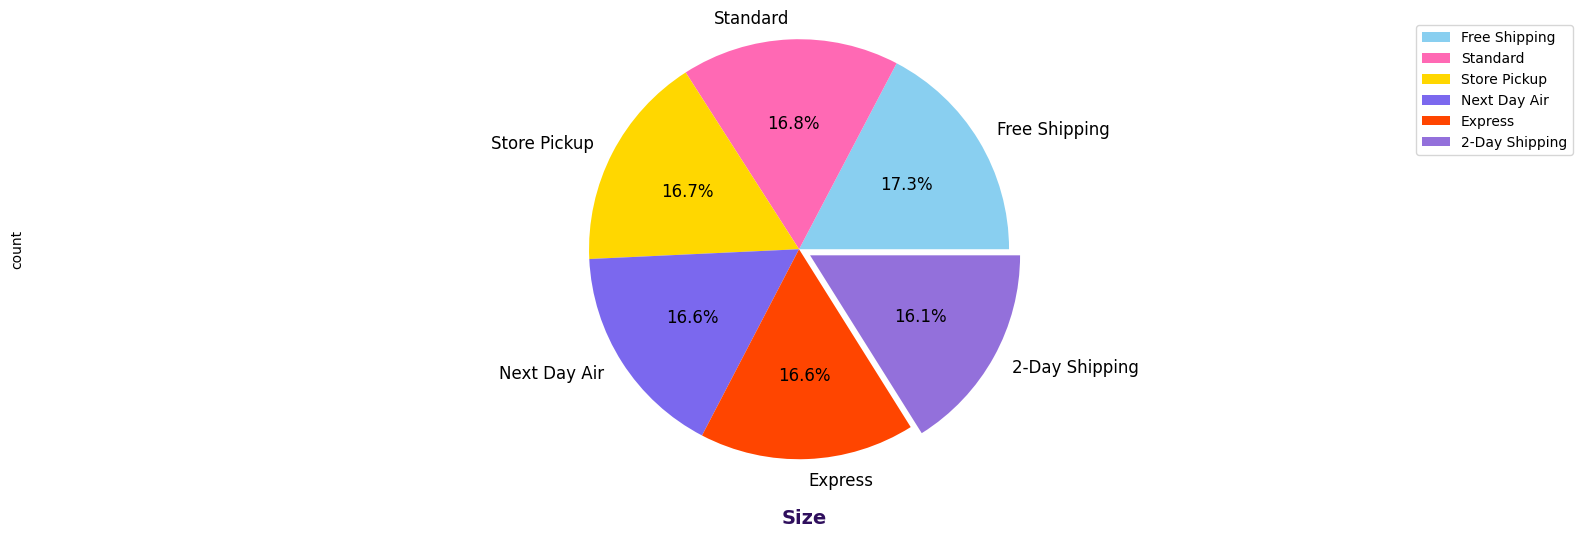

In [32]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [34]:
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

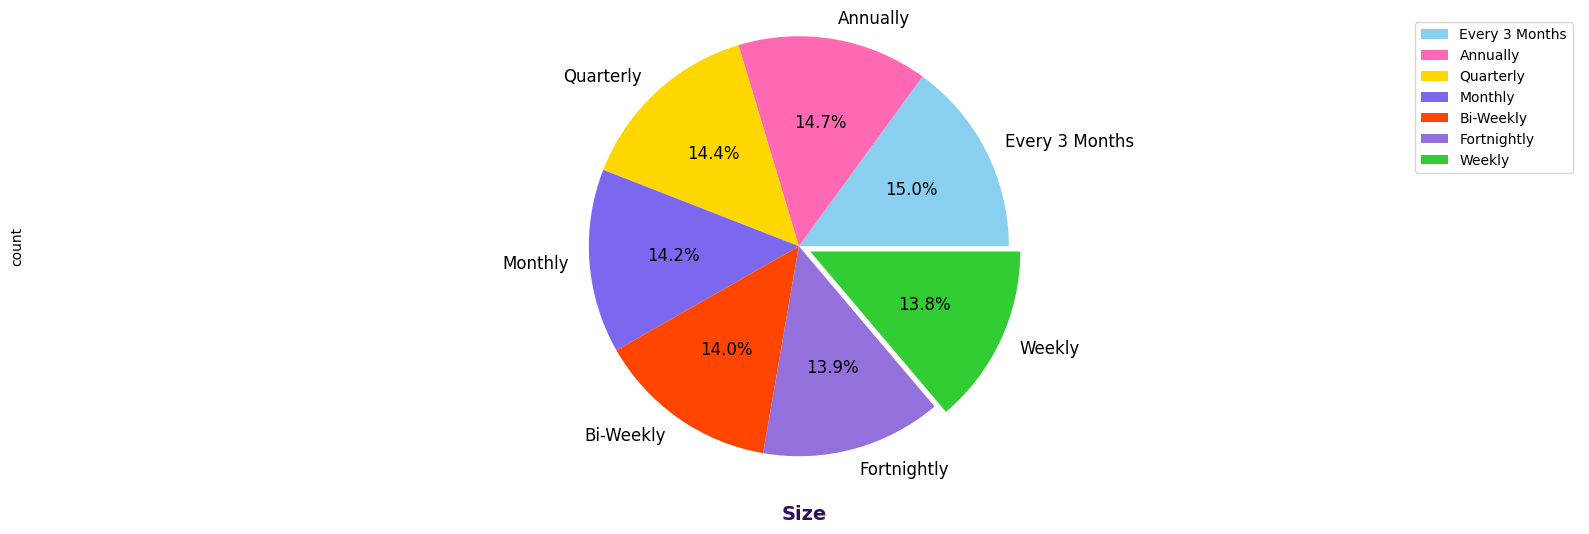

In [35]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

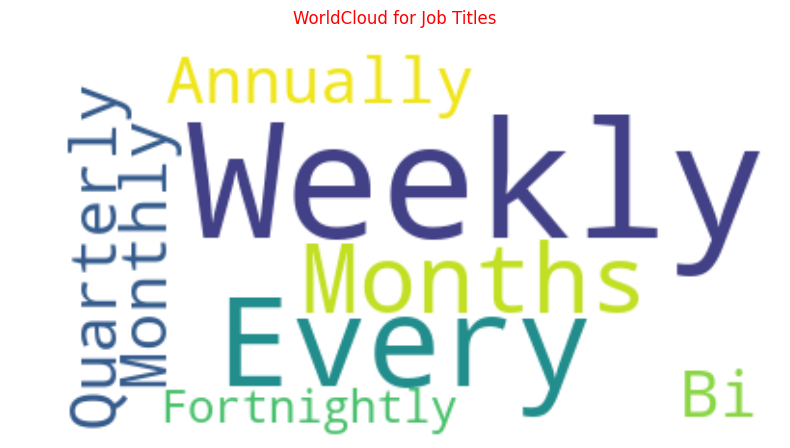

In [33]:
text = " ".join(title for title in df["Frequency of Purchases"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 5))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('WorldCloud for Job Titles\n', fontsize = 12, color = "#FF0000")
plt.show()

<h1 style="color:lightblue;">👖What is the average age of customers in the dataset ?👔</h1>

In [36]:
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


<h1 style="color:lightblue;">👖What is the most common item purchased ?👔</h1>

In [37]:
most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


<h3 style="color:lightblue;">👖What is the total purchase amount for each category ?👔</h3>

In [38]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


<h3 style="color:lightblue;">👖What is the average review rating for male customers and female customers separately ?👔</h3>

In [39]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


<h3 style="color:lightblue;">👖What is the most common payment method used by customers ?👔</h3>

In [ ]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

<h3 style="color:lightblue;">👖What is the median purchase amount (USD) ?👔</h3>

In [40]:
median_purchase_amount = df['Purchase Amount (USD)'].median()
print("Median Purchase Amount (USD):", median_purchase_amount)

Median Purchase Amount (USD): 60.0


<h1 style="color:lightblue;">👖How many customers have opted for the Subscription ?👔</h1>

In [41]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


<h1 style="color:lightblue;">👖What is the average purchase amount for customers with a subscription status of 'Yes' and 'No' ?👔</h1>

In [43]:
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)

Average Purchase Amount for Subscription 'Yes': 59.49192782526116
Average Purchase Amount for Subscription 'No': 59.865121180189675


<h3 style="color:lightblue;">👖What is the most common season for purchases ?👔</h3>

In [44]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


<h1 style="color:lightblue;">👖What is the total purchase amount for each gender ?👔</h1>

In [45]:
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


<h3 style="color:lightblue;">👖What is the average age of customers who made purchases in the All season ?👔</h3>

In [47]:
seasons = ['Spring', 'Summer', 'Winter', 'Winter']

for season in seasons:
    average_age = df[df['Season'] == season]['Age'].mean()
    print(f"Average Age of Customers in the {season} Season:", average_age)

Average Age of Customers in the Spring Season: 44.58258258258258
Average Age of Customers in the Summer Season: 43.973821989528794
Average Age of Customers in the Winter Season: 43.307929969104016
Average Age of Customers in the Winter Season: 43.307929969104016


<h1 style="color:lightblue;">👖How many customers used a promo code for their purchase ?👔</h1>

In [48]:
promo_code_count = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Number of Customers who used Promo Code:", promo_code_count)

Number of Customers who used Promo Code: 1677


<h3 style="color:lightblue;">👖What is the most common shipping type for customers with a review rating?👔</h3>

In [49]:
# Define the rating sections
rating_sections = [(2.5, 2.9), (3.0, 3.9), (4.0, 4.9), (5.0, 5.0)]

# Loop through each section and calculate the most common shipping type
for lower_bound, upper_bound in rating_sections:
    if lower_bound == upper_bound:  # This handles the case for exactly 5.0
        common_shipping = df[df['Review Rating'] == 5.0]['Shipping Type'].mode()[0]
        section_label = "Exactly 5.0"
    else:
        common_shipping = df[(df['Review Rating'] > lower_bound) & (df['Review Rating'] <= upper_bound)]['Shipping Type'].mode()[0]
        section_label = f"{lower_bound}~{upper_bound}"
    
    print(f"Most Common Shipping Type for Review Ratings {section_label}: {common_shipping}")

Most Common Shipping Type for Review Ratings 2.5~2.9: Store Pickup
Most Common Shipping Type for Review Ratings 3.0~3.9: Free Shipping
Most Common Shipping Type for Review Ratings 4.0~4.9: Standard
Most Common Shipping Type for Review Ratings Exactly 5.0: 2-Day Shipping


<h3 style="color:lightblue;">👖How many customers have made more than 30 previous purchases ?👔</h3>

In [50]:
customers_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Customer ID'].count()
print("Number of Customers with more than 30 Previous Purchases:", customers_above_30_previous_purchases)

Number of Customers with more than 30 Previous Purchases: 1549


<h4 style="color:lightblue;">👖What is the most common category of items purchased by female customers with a review rating below 3 ?👔</h4>

In [51]:
common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low Review Rating Female Customers:", common_category_low_rating_female)

Most Common Category for Low Review Rating Female Customers: Clothing


<h3 style="color:lightblue;">👖What is the total purchase amount for customers in each location ?👔</h3>

In [52]:
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Location:")
print(total_purchase_by_location)

Total Purchase Amount by Location:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee    

<div style="border:1px solid black; padding:10px;">
<h3 style="color:lightblue;">👖KDE plot for Purchase Amount by Season👔</h3>
<div style="color:white;">


📌 Peak Location: A peak (mountain) indicates a value at which data is concentrated. It means that data is "piled up" at that value.

📌 Peak Height: The height of a peak indicates how many data points are concentrated near that value. A high peak means that many data points are near that value.

📌 Width: The width (spread) of the kernel density estimate indicates the variability of the data. A wide curve means that the data is distributed over a wide area.

📌 Area: The total area under the kernel density estimation curve is equal to 1. This is a property of the probability density function and indicates that the sum of all probabilities is 1.

📌 Smoothness: The smoothness of the kernel density estimate is controlled by the bandwidth parameter. A larger bandwidth makes the curve smoother, while a smaller bandwidth makes the individual variations of the data points more apparent.

</div>
</div>

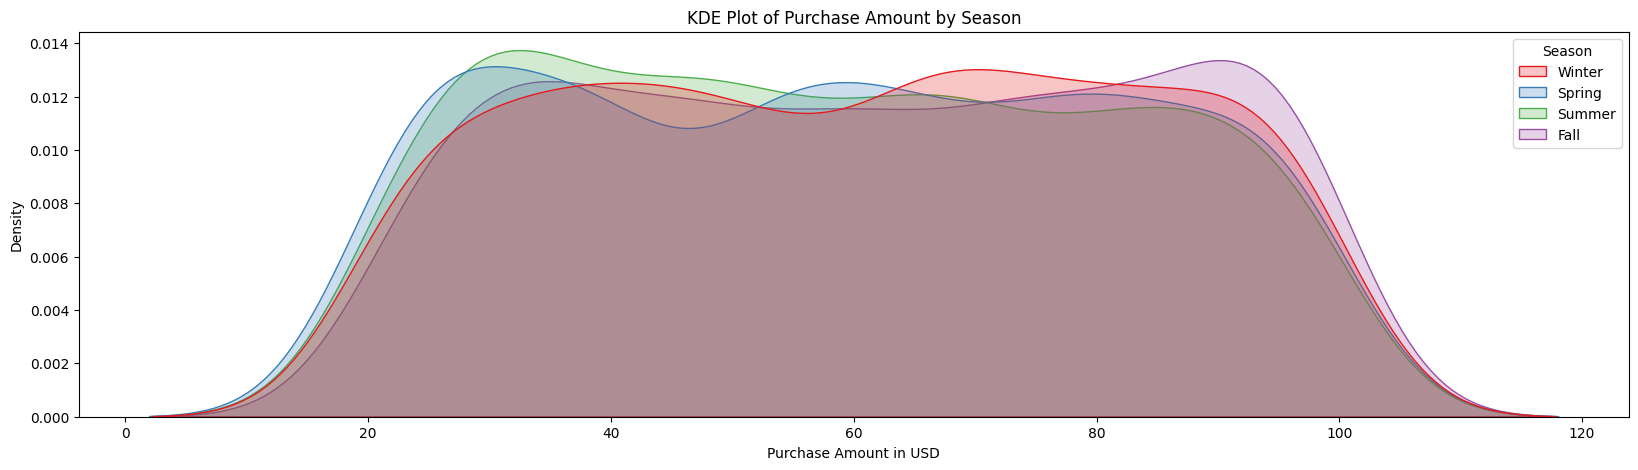

In [53]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

<h4 style="color:lightblue;">👖What is the correlation between a customer's age and their total previous purchases? Calculate the Pearson correlation coefficient👔</h4>

In [61]:
correlation_age_previous_purchases = df['Age'].corr(df['Previous Purchases'], method='pearson')
print("Pearson Correlation between Age and Previous Purchases:", correlation_age_previous_purchases)

Pearson Correlation between Age and Previous Purchases: 0.04044453114289461


<h3 style="color:lightblue;">👖Histogram of Age Distribution👔</h3>

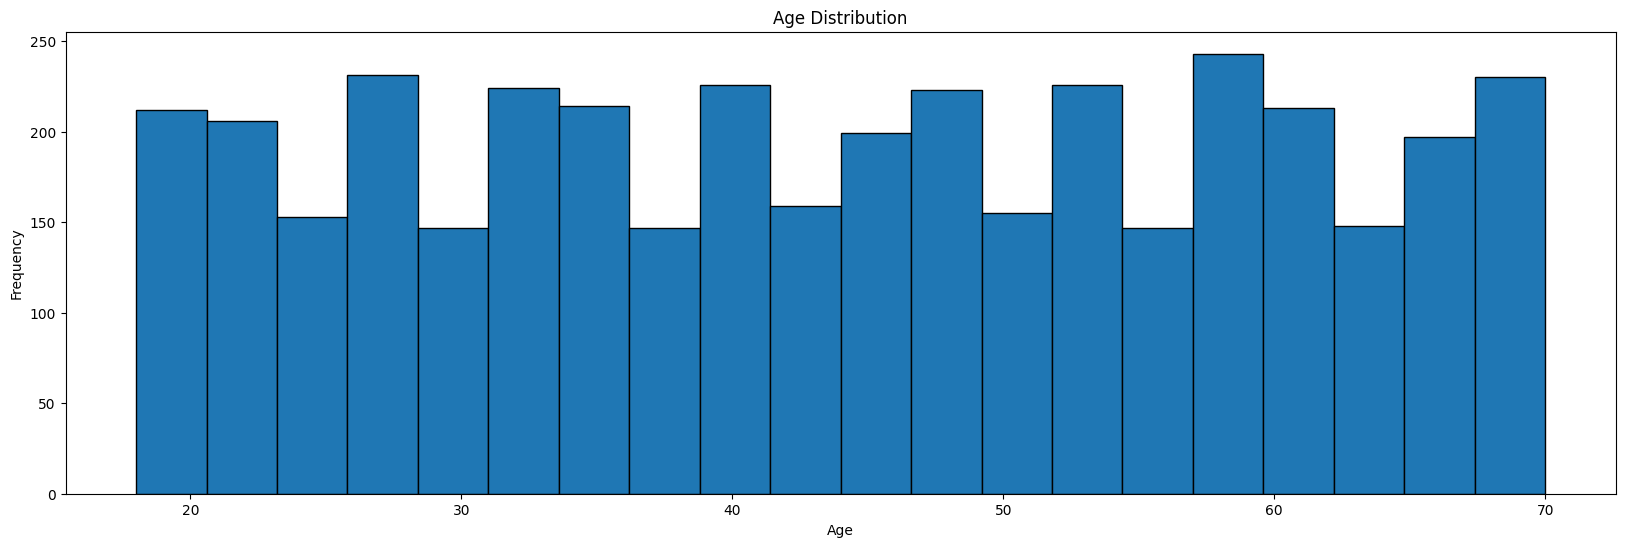

In [54]:
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h3 style="color:lightblue;">👖Box Plot of Purchase Amount by Gende👔</h3>

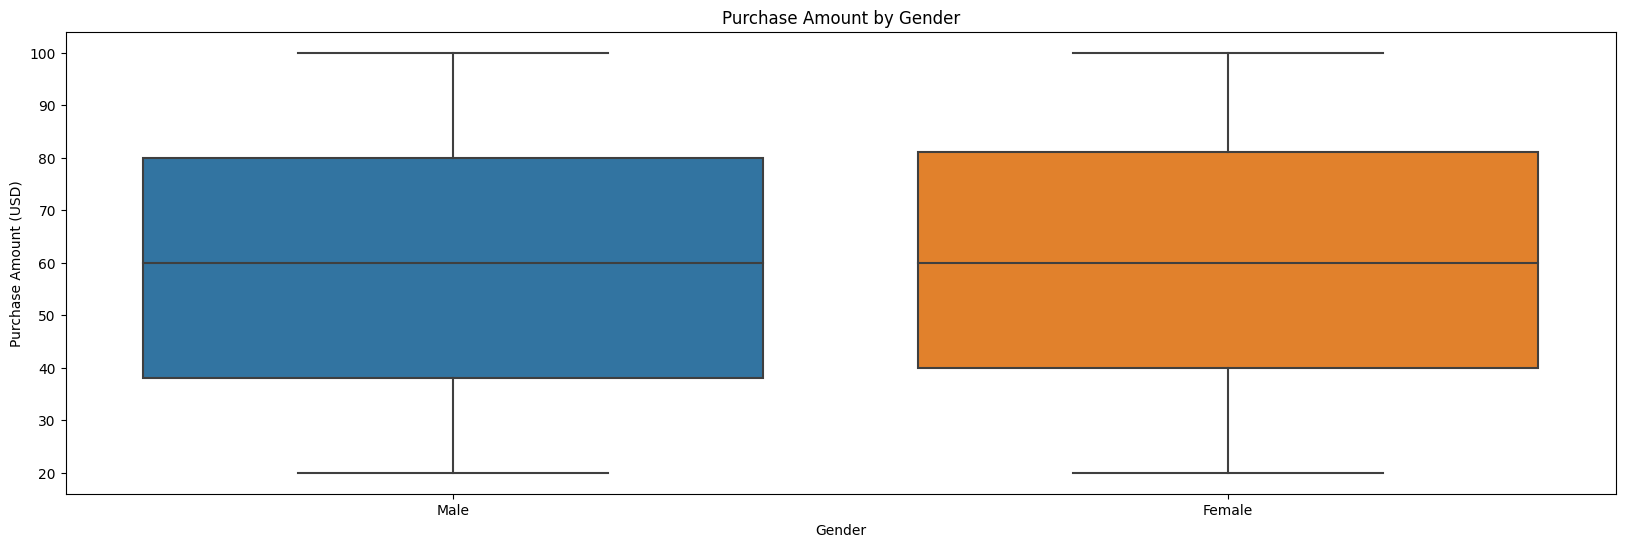

In [62]:
plt.figure(figsize = (20, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

<h3 style="color:lightblue;">👖Scatter Plot of Age vs. Review Rating👔</h3>

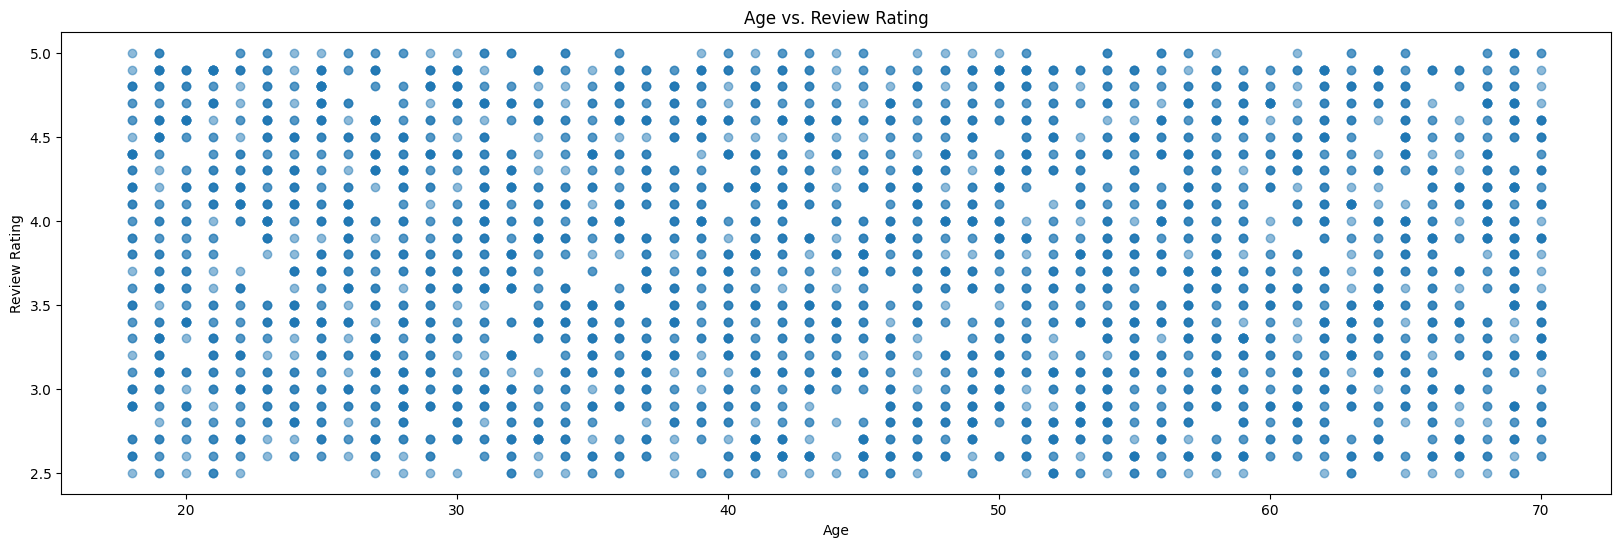

In [63]:
plt.figure(figsize = (20, 6))
plt.scatter(df['Age'], df['Review Rating'], alpha=0.5)
plt.title('Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.show()

<h3 style="color:lightblue;">👖Stacked Bar Chart of Subscription Status by Gender👔</h3>

<Figure size 2000x600 with 0 Axes>

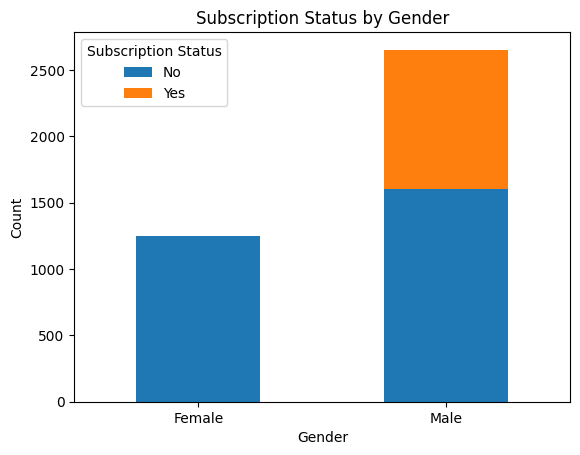

In [4]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

<h3 style="color:lightblue;">👖Violin Plot of Review Rating by Category👔</h3>

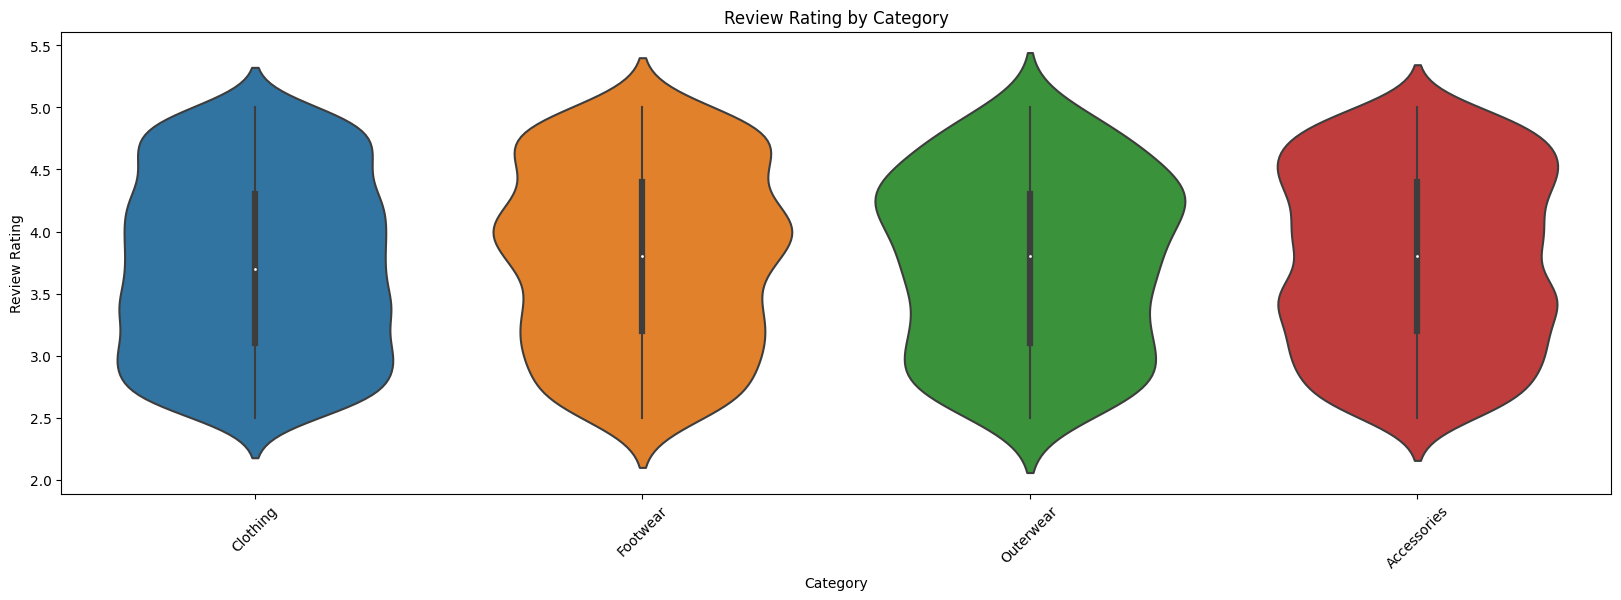

In [5]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()

<h3 style="color:lightblue;">👖Bar Plot of Payment Method by Season👔</h3>

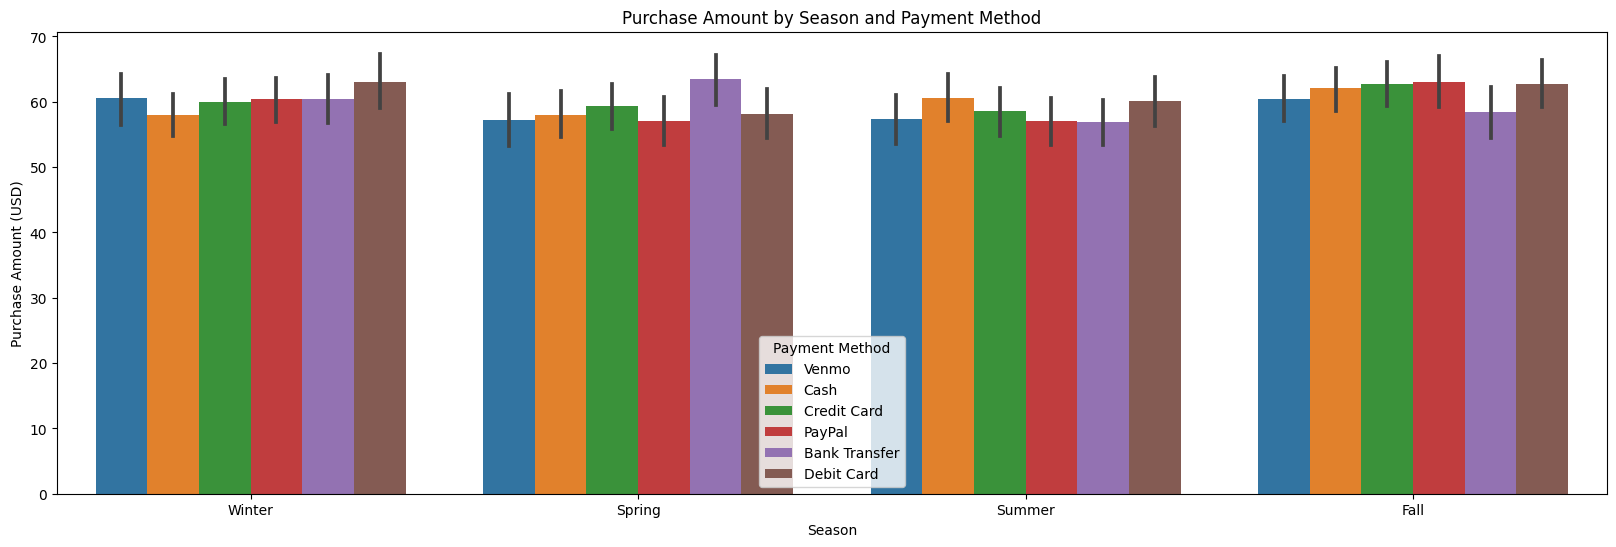

In [6]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

<h3 style="color:lightblue;">👖Area Plot of Total Purchase Amount by Category👔</h3>

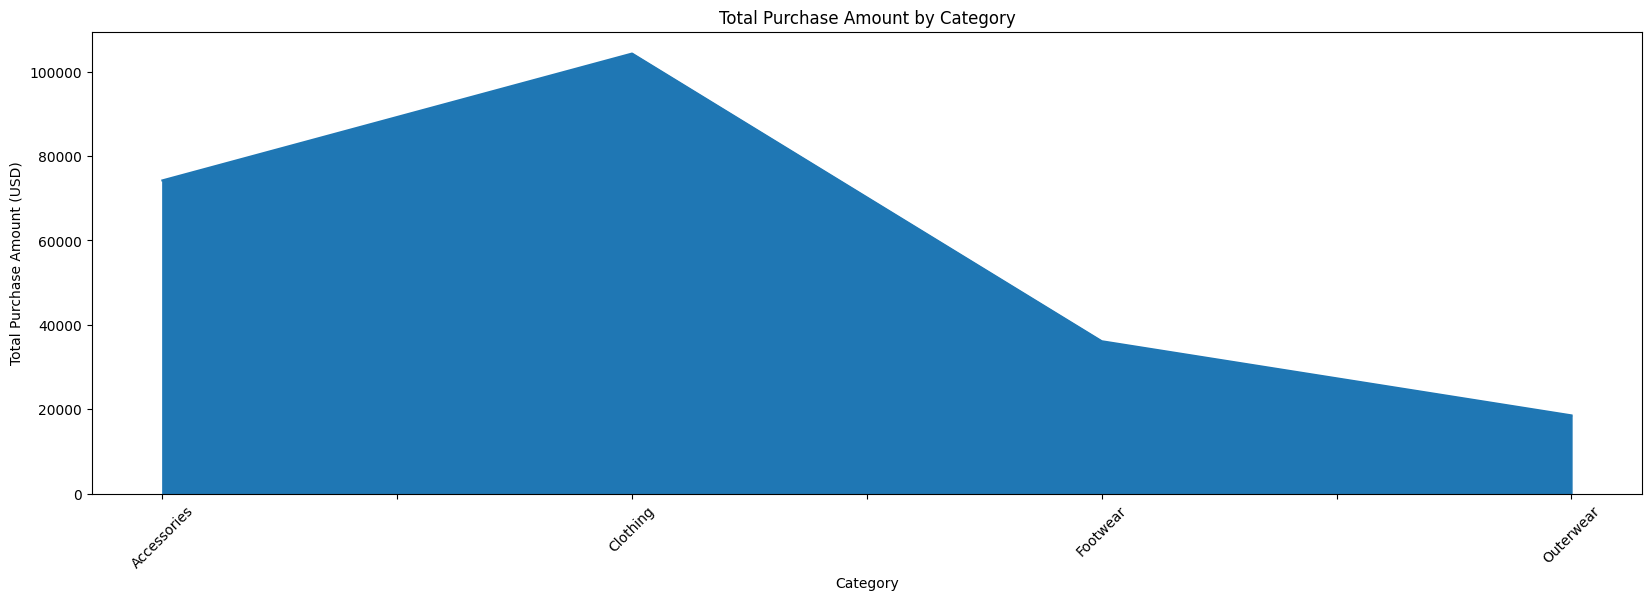

In [7]:
plt.figure(figsize=(20, 6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

<h3 style="color:lightblue;">👖Hexbin Plot of Age vs. Purchase Amount👔</h3>

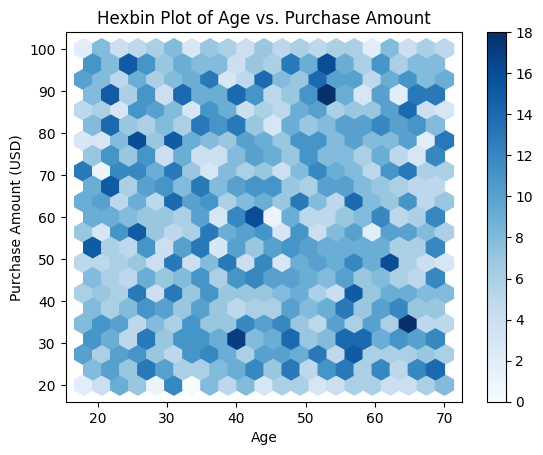

In [8]:
plt.hexbin(df['Age'], df['Purchase Amount (USD)'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

<h3 style="color:lightblue;">👖KDE Plot of Review Rating by Gende👔</h3>

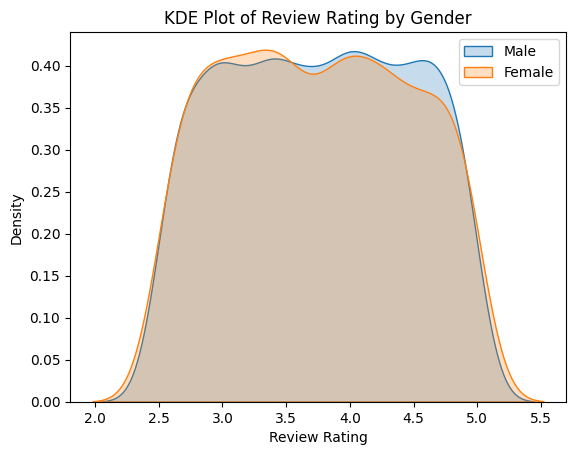

In [9]:
sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label='Female', shade=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()